In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics
import ast
from matplotlib.ticker import PercentFormatter

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

In [2]:
experiment_folders = ['base_1/', 'log_0.2/', 'sigmoid_0.25/']
metrics_dict = {}
avg_dict_scores = {}
avg_dict_epsilons = {}


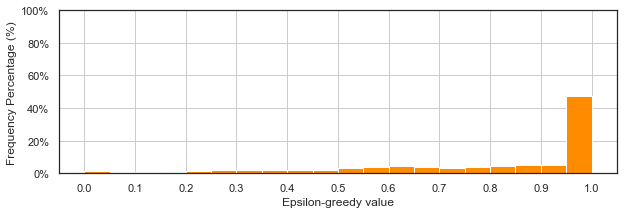

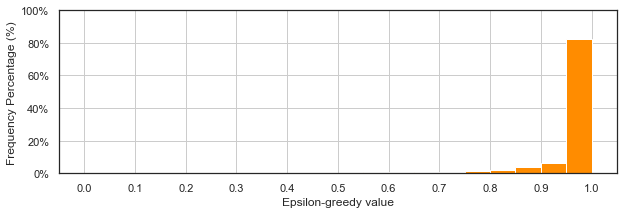

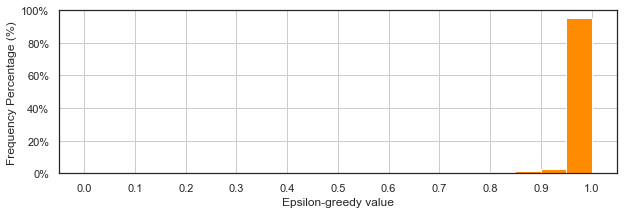

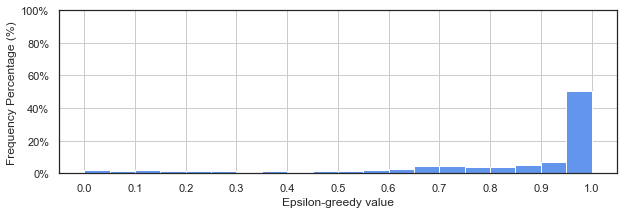

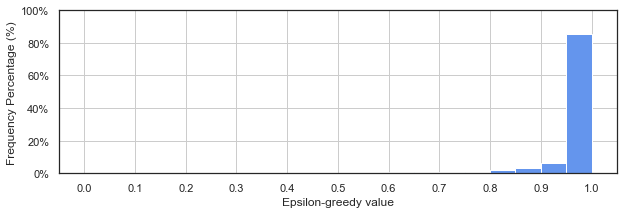

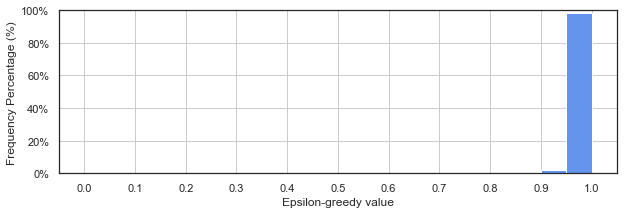

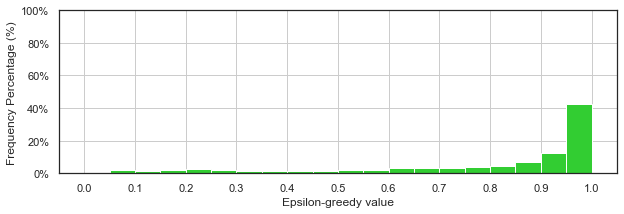

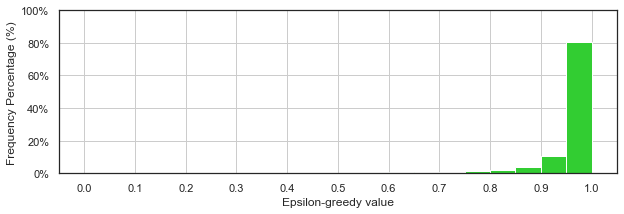

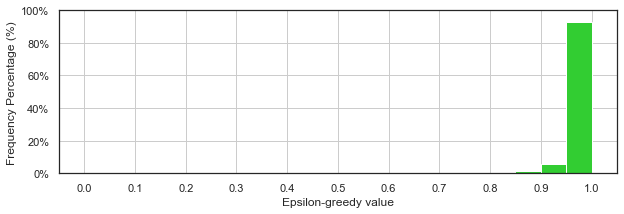

In [3]:
for experiment_folder in experiment_folders:
    
    df = pd.read_csv(experiment_folder + 'El Farol distrib_experiment-table_epsilons.csv')
    df = df.sort_values(by = ['[run number]', '[step]'], ignore_index = True)
    
    num_weeks = 25

    if 'base' in experiment_folder:
        weeks_show = [1,9,17]
        num_weeks = 17
        color = 'darkorange'

    elif 'log' in experiment_folder:
        weeks_show = [1, 8, 16]
        num_weeks = 16
        color = 'cornflowerblue'

    elif 'sigmoid' in experiment_folder:
        weeks_show = [1,10,20]
        num_weeks = 20
        color = 'limegreen'


    num_agents = 400
    metrics_dict[experiment_folder] = {}
    metrics_dict[experiment_folder]['all_epsilons'] = []
    #metrics_dict[experiment_folder]['all_epsilons'] = []
    
    for run_number in df['[run number]'].unique():
        metrics_dict[experiment_folder]['all_epsilons'].append(list(df[df['[run number]'] == run_number]['all-epsilons']))
        #metrics_dict[experiment_folder]['all_epsilons'].append(list(df[df['[run number]'] == run_number]['all-epsilons']))
    
    
    for i in range(len(metrics_dict[experiment_folder]['all_epsilons'])):
        for j in range(len(metrics_dict[experiment_folder]['all_epsilons'][i])):
            metrics_dict[experiment_folder]['all_epsilons'][i][j] = metrics_dict[experiment_folder]['all_epsilons'][i][j].replace(" ", ",")
            metrics_dict[experiment_folder]['all_epsilons'][i][j] = ast.literal_eval(metrics_dict[experiment_folder]['all_epsilons'][i][j])
            metrics_dict[experiment_folder]['all_epsilons'][i][j] = [1 if x>1 else x for x in metrics_dict[experiment_folder]['all_epsilons'][i][j]]

        
    avg_dict_epsilons[experiment_folder] = {}
    #avg_dict = {}
    for i in range(113, 3000, 112):
        avg_dict_epsilons[experiment_folder][int(i/112)] = []
        #avg_epsilons = []
        for k in range(len(metrics_dict[experiment_folder]['all_epsilons'][9][113])):
            sum_ = 0
            avg_ = 0
            for j in range(len(metrics_dict[experiment_folder]['all_epsilons'])):

                metrics_dict[experiment_folder]['all_epsilons'][j][i].sort()

                sum_ += metrics_dict[experiment_folder]['all_epsilons'][j][i][k]

            avg_ = sum_ / (len(metrics_dict[experiment_folder]['all_epsilons']))
            avg_dict_epsilons[experiment_folder][int(i/112)].append(avg_)

    avg_df = pd.Series(avg_dict_epsilons[experiment_folder])
    #avg_df = avg_df.drop([2,3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19,21,22,23,24,25,26])
    
    '''
    list_ = []

    for i in range(400):
        for j in [1,10,20]:
            list_.append({'Weekly Epsilon': avg_df[j][i], 'g': str(j)})

    pd.set_option("min_rows", 100)
    temp_df = pd.DataFrame(list_)
    '''
    
    
    
    for i in weeks_show:
    #for i in [1,10,20]:
        plt.figure(figsize = (10, 3))

        plt.hist(avg_df[i], weights=np.ones(len(avg_df[i])) / len(avg_df[i]), color = color, bins = 20, range=[0, 1])

        #plt.hist(convergence_steps, weights=np.ones(len(convergence_steps)) / len(convergence_steps), bins = 10, color = color)

        plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
        plt.ylim((0, 1))
        plt.grid()
        plt.ylabel("Frequency Percentage (%)")
        plt.xlabel("Epsilon-greedy value")
        plt.xticks(np.arange(0, 1.1, 0.1))
        #plt.box(False)

        #if i < 14:
            #plt.axis('off')
            #plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
            #plt.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False) 
        plt.show()
        #plt.savefig('test.png')
    

In [1]:
#experiment_folders = ['base_1/', 'log_0.2/', 'sigmoid_0.25/']
experiment_folders = ['base_1/']
metrics_dict = {}
avg_dict_scores = {}
avg_dict_epsilons = {}


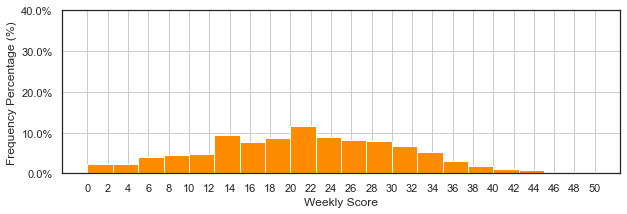

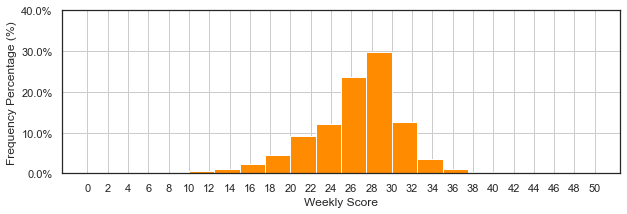

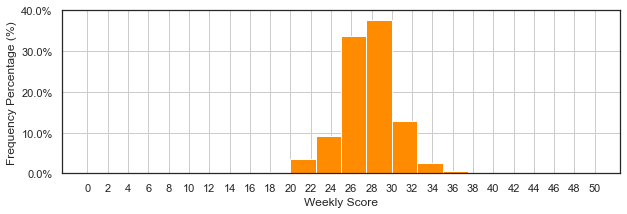

In [16]:
for experiment_folder in experiment_folders:
    
    df = pd.read_csv(experiment_folder + 'El Farol distrib_experiment-table_test.csv')
    df = df.sort_values(by = ['[run number]', '[step]'], ignore_index = True)
    
    num_weeks = 25

    if 'base' in experiment_folder:
        weeks_show = [1,9,17]
        num_weeks = 17
        color = 'darkorange'

    elif 'log' in experiment_folder:
        weeks_show = [1, 8, 16]
        num_weeks = 16
        color = 'cornflowerblue'

    elif 'sigmoid' in experiment_folder:
        weeks_show = [1,10,20]
        num_weeks = 20
        color = 'limegreen'


    num_agents = 400
    metrics_dict[experiment_folder] = {}
    metrics_dict[experiment_folder]['all_scores'] = []
    #metrics_dict[experiment_folder]['all_epsilons'] = []
    
    for run_number in df['[run number]'].unique():
        metrics_dict[experiment_folder]['all_scores'].append(list(df[df['[run number]'] == run_number]['all-scores']))
        #metrics_dict[experiment_folder]['all_epsilons'].append(list(df[df['[run number]'] == run_number]['all-epsilons']))
    
    
    for i in range(len(metrics_dict[experiment_folder]['all_scores'])):
        for j in range(len(metrics_dict[experiment_folder]['all_scores'][i])):
            metrics_dict[experiment_folder]['all_scores'][i][j] = metrics_dict[experiment_folder]['all_scores'][i][j].replace(" ", ",")
            metrics_dict[experiment_folder]['all_scores'][i][j] = ast.literal_eval(metrics_dict[experiment_folder]['all_scores'][i][j])
            #metrics_dict[experiment_folder]['all_scores'][i][j] = [1 if x>1 else x for x in metrics_dict[experiment_folder]['all_scores'][i][j]]

        
    avg_dict_epsilons[experiment_folder] = {}
    #avg_dict = {}
    for i in range(113, 3000, 112):
        avg_dict_epsilons[experiment_folder][int(i/112)] = []
        #avg_epsilons = []
        for k in range(len(metrics_dict[experiment_folder]['all_scores'][9][113])):
            sum_ = 0
            avg_ = 0
            for j in range(len(metrics_dict[experiment_folder]['all_scores'])):

                metrics_dict[experiment_folder]['all_scores'][j][i].sort()

                sum_ += metrics_dict[experiment_folder]['all_scores'][j][i][k]

            avg_ = sum_ / (len(metrics_dict[experiment_folder]['all_scores']))
            avg_dict_epsilons[experiment_folder][int(i/112)].append(avg_)

    avg_df = pd.Series(avg_dict_epsilons[experiment_folder])
    #avg_df = avg_df.drop([2,3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19,21,22,23,24,25,26])
    
    '''
    list_ = []

    for i in range(400):
        for j in [1,10,20]:
            list_.append({'Weekly Epsilon': avg_df[j][i], 'g': str(j)})

    pd.set_option("min_rows", 100)
    temp_df = pd.DataFrame(list_)
    '''
    
    for i in weeks_show:
        #for i in [1,10,20]:
        plt.figure(figsize = (10, 3))

        plt.hist(avg_df[i], weights=np.ones(len(avg_df[i])) / len(avg_df[i]), color = color, bins = 20, range = [0,50])

        #plt.hist(convergence_steps, weights=np.ones(len(convergence_steps)) / len(convergence_steps), bins = 10, color = color)

        plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
        plt.ylim((0, 0.4))
        plt.grid()
        plt.ylabel("Frequency Percentage (%)")
        plt.xlabel("Weekly Score")
        plt.xticks(range(0,51, 2))
        #plt.box(False)

        #if i < 14:
            #plt.axis('off')
            #plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
            #plt.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False) 
        plt.show()
        #plt.savefig('test.png')

    

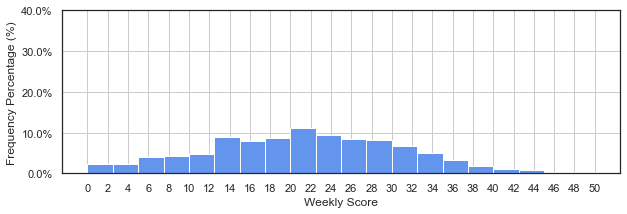

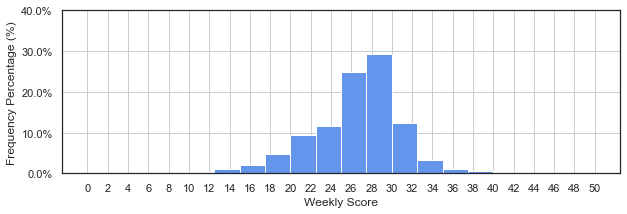

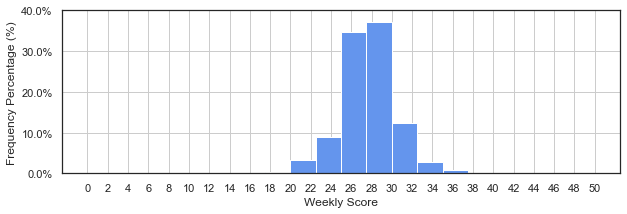

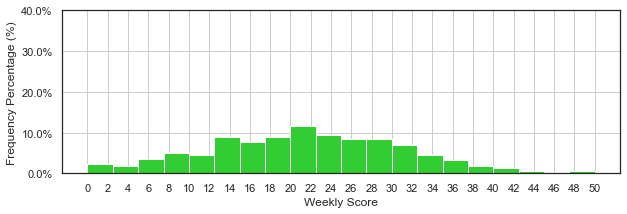

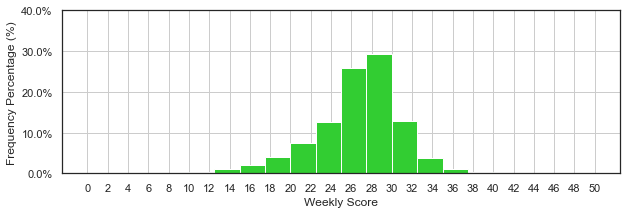

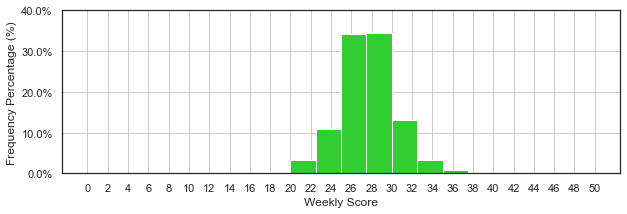